In [183]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [184]:
URL = "https://www.worlddata.info/africa/nigeria/inflation-rates.php"
page = requests.get(URL)
page

<Response [200]>

In [185]:
soup = BeautifulSoup(page.content, 'lxml')

In [186]:
table = soup.find('table')

all_headers = [header.text for header in table.find_all('th')]
headers = []
for header in all_headers:
    header = header.replace('Ø ', "")
    headers.append(header)

results = [{headers[i]: cell.text for i, cell in enumerate(row.find_all('td'))}
           for row in table.find_all('tr')]
del results[0]


In [187]:
results
result = []
for item in results:
    item['Nigeria'] = item['Nigeria'].replace(" %", "")
    item['EU'] = item['EU'].replace(" %", "")
    item['USA'] = item['USA'].replace(" %", "")
    item['World'] = item['World'].replace(" %", "")
    result.append(item)

In [188]:
#reading the dataframe
df_1 = pd.DataFrame(result)
df_1

,Year,Nigeria,EU,USA,World
0,2021,16.95,2.55,4.70,3.42
1,2020,13.25,0.50,1.23,1.92
2,2019,11.40,1.63,1.81,2.19
3,2018,12.09,1.74,2.44,2.44
4,2017,16.52,1.43,2.13,2.19
...,...,...,...,...,...
57,1964,0.86,3.42,1.28,n/a
58,1963,-2.69,2.92,1.24,n/a
59,1962,5.27,3.55,1.20,n/a
60,1961,6.28,2.08,1.07,n/a


In [189]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     62 non-null     object
 1   Nigeria  62 non-null     object
 2   EU       62 non-null     object
 3   USA      62 non-null     object
 4   World    62 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB


In [190]:
df_1.describe()

,Year,Nigeria,EU,USA,World
count,62,62,62,62,62
unique,62,62,59,60,41
top,2021,16.95,2.67,1.46,n/a
freq,1,1,2,2,20


In [191]:
#the unique values in information
df_1.nunique()

Year       62
Nigeria    62
EU         59
USA        60
World      41
dtype: int64

In [192]:
#confirming the null values in the data
df_1.isnull().sum()

Year       0
Nigeria    0
EU         0
USA        0
World      0
dtype: int64

In [193]:
#the number of rows and columns 
df_1.shape

(62, 5)

## Data Wrangling

In [194]:
#taking all the n/a values to be 0
df_1['World'] = df_1['World'].apply(lambda x: x.replace("n/a","0"))

In [195]:
#convert the values to float type
df_1['Nigeria'] = df_1['Nigeria'].astype('float')
df_1['EU'] = df_1['EU'].astype('float')
df_1['USA'] = df_1['USA'].astype('float')
df_1['World'] = df_1['World'].astype('float')

In [196]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     62 non-null     object 
 1   Nigeria  62 non-null     float64
 2   EU       62 non-null     float64
 3   USA      62 non-null     float64
 4   World    62 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


## Creating a Copy of The Dataset

In [216]:
df = df_1.copy()
df.head()

,Year,Nigeria,EU,USA,World
0,2021,16.95,2.55,4.70,3.42
1,2020,13.25,0.50,1.23,1.92
2,2019,11.40,1.63,1.81,2.19
3,2018,12.09,1.74,2.44,2.44
4,2017,16.52,1.43,2.13,2.19


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

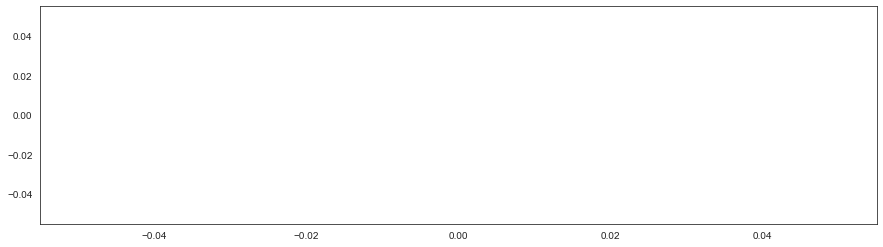

In [226]:
sns.set_style("white")
data = df[df["Year"] == 2021]
fig, ax = plt.subplots(1,1,figsize=(15,4))
ax.plot(data.Year, data.Nigeria, color = "slategrey", marker="o", linewidth=2)
ax.fill_between(data.Year, 0, data.Nigeria, alpha=0.2, color='g', where=(data.Nigeria >= 0))
ax.fill_between(data.Year, 0, ddata.Nigeria, alpha=0.2, color='r', where=(data.Nigeria < 0))
ax.set_xticks(data.Year)
ax.set_xticklabels(data.Year, rotation=90)
ax.set_title("Inflation evolution in "+country, loc="left", fontsize=20)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Inflation in %", fontsize=14)
sns.despine()

### Question 1. What are the years with the highest inflation rate in Nigeria, EU, USA and the World?

In [217]:
#grouping by year and country to see the inflation rates
Ng__inflation = df.groupby('Nigeria')['Year'].sum()
_inflation = Ng__inflation.sort_values(ascending=False).reset_index()
Ng_inflation = _inflation.head(10)
Ng_inflation

,Nigeria,Year
0,16.95,2021
1,13.25,2020
2,11.40,2019
3,12.09,2018
4,16.52,2017
5,15.68,2016
6,9.01,2015
7,8.06,2014
8,8.48,2013
9,12.22,2012


In [218]:
#grouping by year and country to see the inflation rates in descending order
EU__inflation = df.groupby('EU')['Year'].sum()
_inflation = EU__inflation.sort_values(ascending=False).reset_index()
EU_inflation = _inflation.head(10)
EU_inflation

,EU,Year
0,2.55,2021
1,0.50,2020
2,1.63,2019
3,1.74,20181960
4,1.43,2017
5,0.18,2016
6,-0.06,2015
7,0.20,2014
8,1.22,2013
9,2.66,2012


In [219]:
#grouping by year and country to see the inflation rates in descending order
USA__inflation = df.groupby('USA')['Year'].sum()
_inflation = USA__inflation.sort_values(ascending=False).reset_index()
USA_inflation = _inflation.head(10)
USA_inflation

,USA,Year
0,4.70,2021
1,1.23,2020
2,1.81,2019
3,2.44,2018
4,2.13,2017
5,1.26,2016
6,0.12,2015
7,1.62,2014
8,1.46,20131960
9,2.07,2012


In [220]:
#grouping by year and country to see the inflation rates in descending order
World__inflation = df.groupby('World')['Year'].sum()
_inflation = World__inflation.sort_values(ascending=False).reset_index()
World_inflation = _inflation.head(10)
World_inflation

,World,Year
0,3.42,2021
1,1.92,2020
2,2.19,20192017
3,2.44,2018
4,1.55,2016
5,1.43,2015
6,2.35,2014
7,2.62,2013
8,3.73,2012
9,4.82,20112007


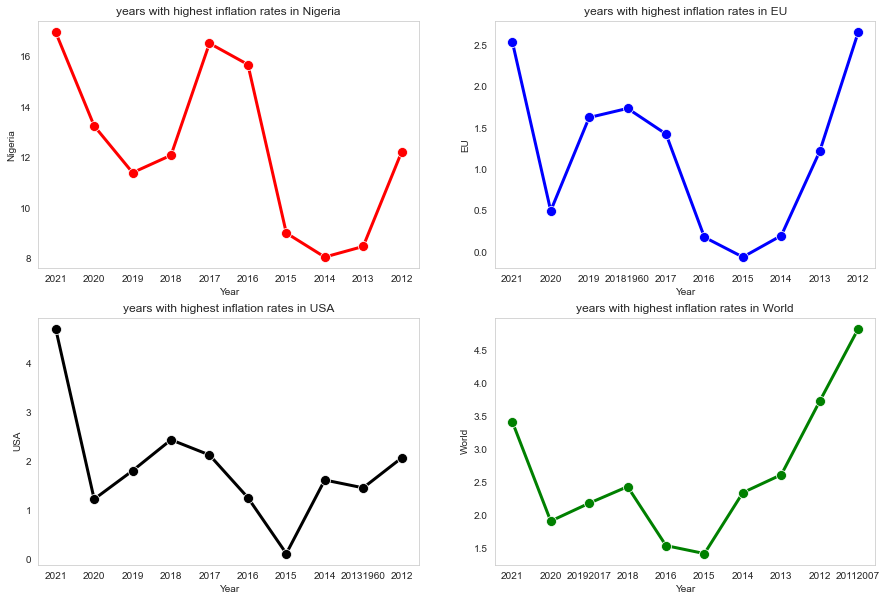

In [221]:
sns.set_style("whitegrid")

#make a subplot of size 2,2
plt.figure(figsize=(15,10))
fig.tight_layout(pad=3)

#inflation rates in Nigeria
plt.subplot(2,2,1)
ax1 = sns.lineplot(data = Ng_inflation, y = 'Nigeria', x = 'Year', color='red', linewidth=3, marker='o', markersize=10)
ax1.title.set_text('years with highest inflation rates in Nigeria')
ax1.grid(False)

#inflation rates in EU
plt.subplot(2,2,2)
ax2 = sns.lineplot(data = EU_inflation, y = 'EU', x = 'Year', color='blue', linewidth=3, marker='o', markersize=10)
ax2.title.set_text('years with highest inflation rates in EU')
ax2.grid(False)

#inflation rates in USA
plt.subplot(2,2,3)
ax3 = sns.lineplot(data = USA_inflation, y = 'USA', x = 'Year', color='black', linewidth=3, marker='o', markersize=10)
ax3.title.set_text('years with highest inflation rates in USA')
ax3.grid(False)

#inflation rates in World
plt.subplot(2,2,4)
ax4 = sns.lineplot(data = World_inflation, y = 'World', x = 'Year', color='green', linewidth=3, marker='o', markersize=10)
ax4.title.set_text('years with highest inflation rates in World')
ax4.grid(False)
plt.show()

### Question 2. What average inflation rate for all the years?

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     62 non-null     object 
 1   Nigeria  62 non-null     float64
 2   EU       62 non-null     float64
 3   USA      62 non-null     float64
 4   World    62 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


In [222]:
result = df.set_index('Year')
result

,Nigeria,EU,USA,World
Year,,,,
2021,16.95,2.55,4.70,3.42
2020,13.25,0.50,1.23,1.92
2019,11.40,1.63,1.81,2.19
2018,12.09,1.74,2.44,2.44
2017,16.52,1.43,2.13,2.19
...,...,...,...,...
1964,0.86,3.42,1.28,0.00
1963,-2.69,2.92,1.24,0.00
1962,5.27,3.55,1.20,0.00


AttributeError: 'DataFrame' object has no attribute 'Rate'

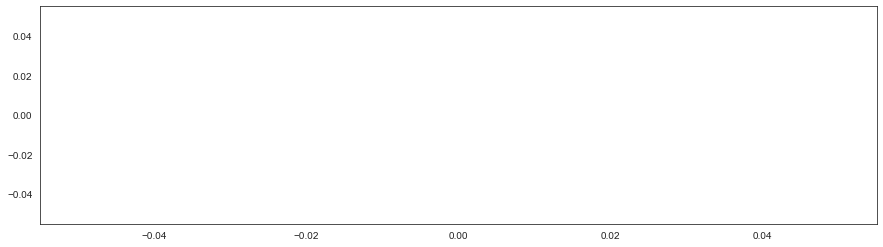

<AxesSubplot:>

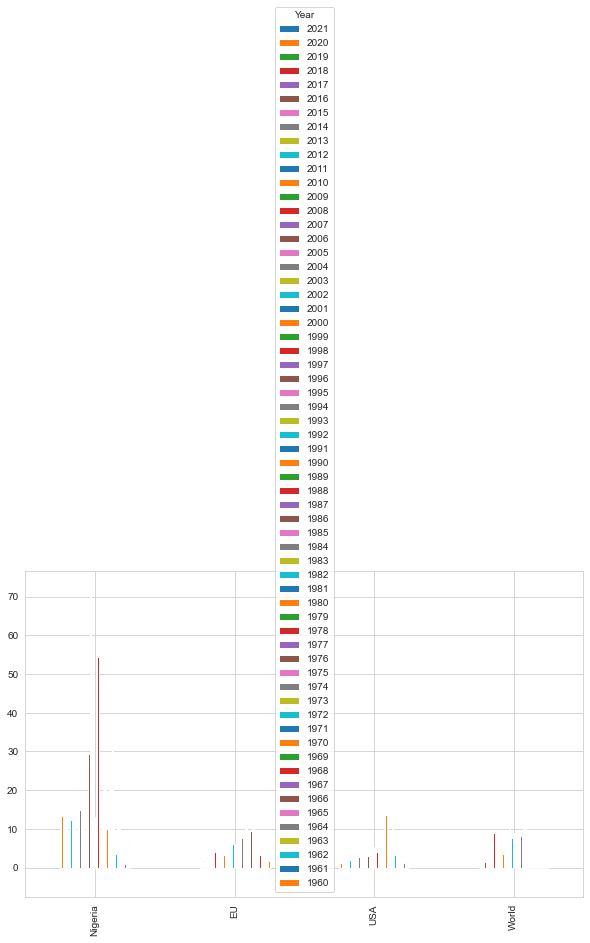

In [215]:
result.plot(kind="bar")
# plt.rcParams["figure.figsize"] = [10, 6]